In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
import numpy as np
from hmmlearn import hmm

In [3]:
import fileinput
import glob

file_list = glob.glob("*.txt")

with open('result.txt', 'w') as file:
    input_lines = fileinput.input(file_list)
    file.writelines(input_lines)

In [4]:
file_list

['result.txt', 'tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

In [29]:
with open('result.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я ]','', text)

In [30]:
Russian = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(Russian)}

In [31]:
probabilities = np.zeros((len(Russian), len(Russian)))

In [32]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]]+= 1

In [33]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [34]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))

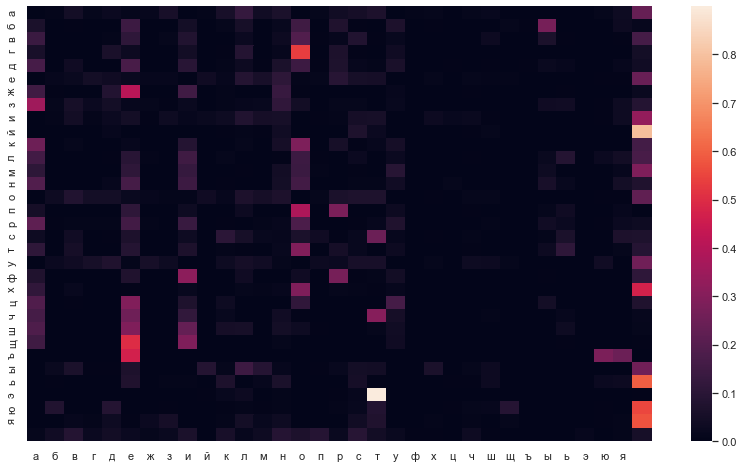

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [51]:
start = POS['п']
end = POS['р']
prior = 1. / len(Russian)
for c in Russian:
    if c != ' ':
        for c1 in Russian:
            proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[c1]] * probabilities[POS[c1], end]
            if proba > 0 and c1 != ' ':
                print(''.join(['п', c, c1, 'р']), proba)

паар 1.2861294615670748e-08
пабр 1.0463297912935638e-06
павр 1.1943064367697012e-06
пагр 1.323745150648832e-06
падр 3.0312598678340207e-06
паер 2.0094151071580564e-06
пажр 7.533524086065053e-09
пазр 1.2462329996322449e-06
паир 2.6249966485849846e-08
пайр 2.8436032855227694e-08
пакр 4.987544545420132e-06
палр 3.4630088933366065e-09
памр 1.126218932098043e-07
панр 1.1965181886103109e-07
паор 4.471186499829828e-08
папр 5.796884642842818e-06
парр 2.9572571724020078e-08
паср 5.196131991570188e-07
патр 5.699536966609488e-06
паур 7.133408841358231e-08
пафр 3.273120430827629e-06
пахр 2.5147823049456587e-07
пачр 2.7309274088930096e-08
пашр 5.425580532227317e-09
пащр 4.68289641627989e-09
паэр 3.5057943460701446e-10
паюр 1.6636372746661016e-07
паяр 1.5390975580435555e-07
пвар 2.891435354905608e-09
пвбр 1.642710111867701e-11
пввр 8.407285819330329e-12
пвгр 3.42172326649639e-11
пвдр 2.766956414021389e-10
пвер 5.213208176710744e-09
пвжр 4.027858049579562e-15
пвзр 8.74309711437102e-11
пвир 3.54602513

In [21]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бесееродл


In [22]:
from hmmlearn.hmm import GaussianHMM

In [23]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

In [24]:
values = series.values.reshape(-1,1)

In [28]:
for n in range(1, 6):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.45793588019535
3 -465.4758943249863
4 -454.5453273063033
5 -447.6657088378957


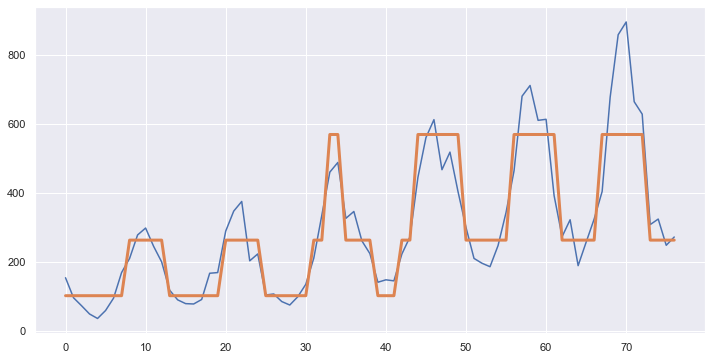

In [26]:
model = GaussianHMM(n_components=3,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)